In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS

In [2]:
songs_5000 = pd.read_csv("audio_features_5000.csv")

In [3]:
songs_5000.columns = ["name", "artist", "danceability", "energy", "key", "loudness", "mode", "speechiness", 
                      "acousticness", "instrumentalness", "liveness", "valence", "tempo", "type", 
                      "duration_ms", "time_signature", "id", "html"]

In [4]:
songs_5000.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [5]:
# songs_5000.set_index(["name", "artist"], inplace = True)

In [6]:
songs_5000.drop(columns = ["type", "duration_ms"], inplace = True)

In [7]:
songs_5000.drop_duplicates(inplace = True)

In [8]:
songs_scaled_std = StandardScaler().fit_transform(songs_5000.iloc[:, 2:-2])

In [9]:
songs_scaled_5000 = pd.DataFrame(songs_scaled_std, index = songs_5000.index, columns = songs_5000.columns[2:-2])

In [10]:
songs_scaled_5000.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.689282,-1.362837,1.606473,-0.596613,-1.355423,-0.177738,1.129350,-0.699584,5.276143,-0.490916,-0.290076,0.232548
1,1.074485,-0.878966,-0.913278,-0.518215,0.737777,-0.682599,-0.207737,-0.699737,-0.525247,0.901884,0.223022,0.232548
2,1.574332,0.265043,-0.913278,-0.265126,0.737777,3.710674,0.453799,-0.699571,-0.411625,1.664865,-0.873685,0.232548
3,0.904812,-2.084496,-0.353333,-1.384389,0.737777,-0.506812,1.647926,-0.699633,1.339486,0.293659,-0.415140,0.232548
4,0.657182,-1.846708,0.206611,-1.652366,0.737777,-0.634785,1.751642,-0.698819,-0.545297,-0.145415,0.079622,0.232548


In [11]:
seed = 10

In [12]:
inertia_list = []
for i in range(20, 51):
    km1 = KMeans(n_clusters = i, random_state = seed)
    km1.fit(songs_scaled_5000)
    inertia_list.append(round(km1.inertia_))
inertia_list

[23028,
 22663,
 22339,
 21981,
 21709,
 21453,
 21126,
 20881,
 20612,
 20424,
 20057,
 19823,
 19654,
 19469,
 19349,
 19064,
 18830,
 18759,
 18523,
 18347,
 18103,
 18062,
 17813,
 17719,
 17518,
 17414,
 17351,
 17157,
 17060,
 16952,
 16735]

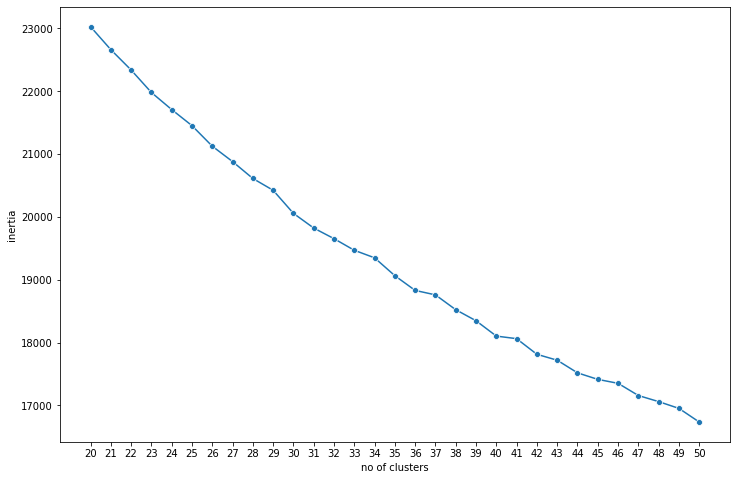

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = range(20, 51), y = inertia_list, marker = "o")
plt.xlabel("no of clusters")
plt.ylabel("inertia")
ax.set_xticks(range(20, 51));
plt.savefig("inertia.jpg", bbox_inches = "tight", dpi = 150)

In [14]:
sil_score_list = []
for i in range(20, 51):
    km2 = KMeans(n_clusters = i, random_state = seed)
    km2.fit(songs_scaled_5000)
    sil_score_list.append(silhouette_score(songs_scaled_5000, km2.labels_))
sil_score_list

[0.13443338237220348,
 0.13147050889968603,
 0.12617306260618158,
 0.13472374587265476,
 0.1361800052723811,
 0.12886817968611192,
 0.1328041376058114,
 0.13267218629839736,
 0.13323021296698315,
 0.13648425199126038,
 0.13349071747660968,
 0.1336834963844015,
 0.12758265820864206,
 0.1357525416062972,
 0.13260036468238073,
 0.1324917124395101,
 0.13583652512232133,
 0.1327800828172956,
 0.1348191643564813,
 0.1348361301084811,
 0.13284322998220108,
 0.1382242368322292,
 0.13586357555071174,
 0.14019199082432504,
 0.13565197421698136,
 0.13740613911590777,
 0.13342548998733572,
 0.13530094991207195,
 0.1386456225673259,
 0.1334531016330282,
 0.13829185108238512]

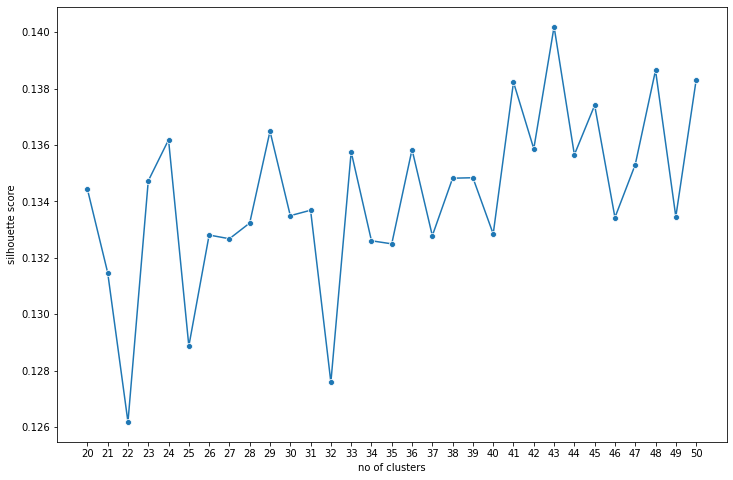

In [30]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = range(20, 51), y = sil_score_list, marker = "o")
plt.xlabel("no of clusters")
plt.ylabel("silhouette score")
ax.set_xticks(range(20, 51));
plt.savefig("silhouette.jpg", bbox_inches = "tight", dpi = 150)

In [16]:
km = KMeans(n_clusters = 43, random_state = seed)

In [17]:
km.fit(songs_scaled_5000)

KMeans(n_clusters=43, random_state=10)

In [18]:
clusters = km.predict(songs_scaled_5000)

In [19]:
songs_scaled_5000["cluster"] = clusters

In [20]:
songs_scaled_5000.insert(0, "name", songs_5000["name"])

In [21]:
songs_scaled_5000.insert(1, "artist", songs_5000["artist"])

In [22]:
songs_scaled_5000["id"] = songs_5000["id"]

In [23]:
songs_scaled_5000["html"] = songs_5000["html"]

In [24]:
songs_scaled_5000.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.689282,-1.362837,1.606473,-0.596613,-1.355423,-0.177738,1.129350,-0.699584,5.276143,-0.490916,-0.290076,0.232548,28,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,1.074485,-0.878966,-0.913278,-0.518215,0.737777,-0.682599,-0.207737,-0.699737,-0.525247,0.901884,0.223022,0.232548,5,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,1.574332,0.265043,-0.913278,-0.265126,0.737777,3.710674,0.453799,-0.699571,-0.411625,1.664865,-0.873685,0.232548,36,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.904812,-2.084496,-0.353333,-1.384389,0.737777,-0.506812,1.647926,-0.699633,1.339486,0.293659,-0.415140,0.232548,9,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.657182,-1.846708,0.206611,-1.652366,0.737777,-0.634785,1.751642,-0.698819,-0.545297,-0.145415,0.079622,0.232548,33,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [25]:
songs_scaled_5000.groupby("cluster")["id"].count()

cluster
0     284
1     142
2     199
3     150
4      88
5     228
6     108
7     179
8     227
9     160
10     39
11    157
12    164
13    119
14     88
15     88
16    103
17     28
18     71
19    160
20    179
21     65
22    101
23    122
24     88
25    102
26    126
27    155
28     37
29     80
30     38
31    107
32     25
33     94
34    267
35     88
36    135
37    106
38    101
39    102
40    130
41     96
42     49
Name: id, dtype: int64

In [36]:
cluster0 = songs_scaled_5000[songs_scaled_5000.cluster == 0]

In [38]:
artist_concat0 = cluster0["artist"].str.cat(sep = " ")

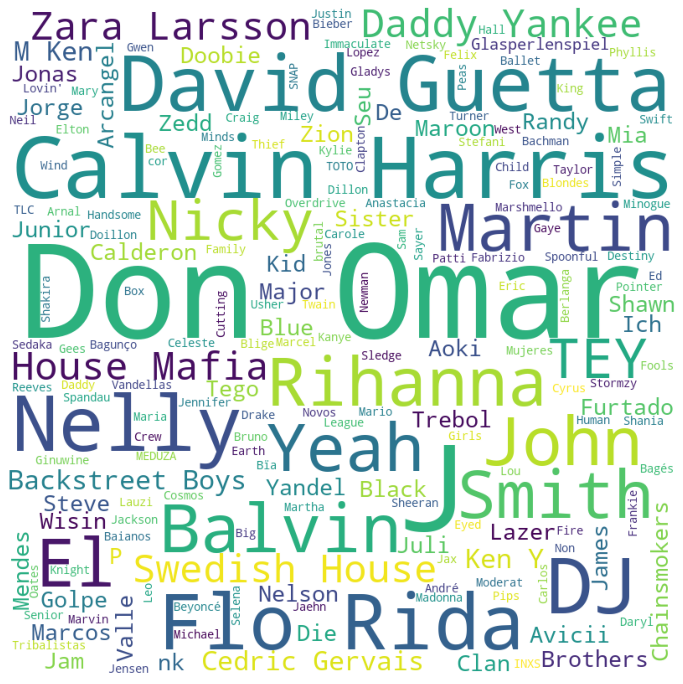

In [40]:
word_cloud = WordCloud(width = 800, height = 800, background_color = "white", stopwords = STOPWORDS).generate(artist_concat0)
plt.figure(figsize = (12, 15))
plt.imshow(word_cloud)
plt.axis("off");
word_cloud.to_file("cluster0.jpg")

In [47]:
cluster0["artist"].value_counts()

Don Omar                                            6
Calvin Harris                                       5
Flo Rida                                            4
David Guetta                                        4
Swedish House Mafia                                 3
                                                   ..
Madonna                                             1
Mario                                               1
Kylie Minogue                                       1
Sam Smith                                           1
Tye Tribbett                                        1
Name: artist, Length: 228, dtype: int64

In [58]:
cluster0_top = cluster0[cluster0.artist.str.contains("Don Omar|Calvin Harris|Flo Rida|David Guetta", case = False, regex = True)]
cluster0_top

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,id,html
670,Low (feat. T-Pain) ...,Flo Rida,1.881577,-0.153160,1.326501,0.591387,-1.355423,-0.056796,-0.555884,-0.699742,-0.311370,-0.498114,0.326916,0.232548,0,0CAfXk7DXMnon4gLudAp7J,https://open.spotify.com/track/0CAfXk7DXMnon4g...
705,How Deep Is Your Love ...,Calvin Harris,1.056142,0.742002,1.606473,0.792053,-1.355423,-0.141174,-0.706131,-0.695196,1.352853,-0.382947,0.116784,0.232548,0,22mek4IiqubGD9ctzxc69s,https://open.spotify.com/track/22mek4IiqubGD9c...
709,"I Don't Like It, I Love It (feat. Robin Thicke...",Flo Rida,1.588089,0.389467,1.046529,0.740738,-1.355423,0.813702,-0.748178,-0.699742,-0.710383,1.229390,-0.023152,0.232548,0,62ml8YAQDAP6PkZAZUFNRO,https://open.spotify.com/track/62ml8YAQDAP6PkZ...
724,Sexy Bitch (feat. Akon) ...,David Guetta,1.409245,-0.070211,1.606473,0.694333,-1.355423,-0.485717,-0.607461,-0.698970,-0.251218,1.477719,0.397181,0.232548,0,28O4PwkH8bzARStxeL4pxL,https://open.spotify.com/track/28O4PwkH8bzARSt...
740,My House ...,Flo Rida,0.826854,0.168269,0.486584,0.725692,-1.355423,-0.467435,-0.755746,-0.699742,-0.384890,1.071035,-0.862907,0.232548,0,6Knv6wdA0luoMUuuoYi2i1,https://open.spotify.com/track/6Knv6wdA0luoMUu...
1575,Sexy Bitch (feat. Akon) ...,David Guetta,1.400073,-0.090948,1.606473,0.689898,-1.355423,-0.485717,-0.599893,-0.698085,-0.364839,1.290572,0.397006,0.232548,0,127uq83uGFapbddqiMUKky,https://open.spotify.com/track/127uq83uGFapbdd...
1817,2U (feat. Justin Bieber) ...,David Guetta,0.184849,-0.011455,0.766556,0.561770,-1.355423,-0.338056,-0.202131,-0.699742,0.263422,0.412425,0.919307,0.232548,0,3A7qX2QjDlPnazUsRk5y0M,https://open.spotify.com/track/3A7qX2QjDlPnazU...
2245,Low (feat. T-Pain) ...,Flo Rida,1.661461,0.137163,1.326501,0.760694,-1.355423,-0.335243,-0.641099,-0.699742,-0.217800,-0.260582,0.327650,0.232548,0,7jOuIhMrkiKj7bvYhRqaym,https://open.spotify.com/track/7jOuIhMrkiKj7bv...
2685,Sweet Nothing (feat. Florence Welch) ...,Calvin Harris,0.299493,0.952831,0.766556,0.860314,-1.355423,0.363686,-0.263799,-0.699440,-0.861433,0.502399,0.324326,0.232548,0,24LS4lQShWyixJ0ZrJXfJ5,https://open.spotify.com/track/24LS4lQShWyixJ0...
2711,Drinking from the Bottle (feat. Tinie Tempah) ...,Calvin Harris,0.721382,0.804214,1.046529,0.823412,-1.355423,-0.446341,-0.684547,-0.699574,-0.889504,0.315253,0.328805,0.232548,0,1oHxIPqJyvAYHy0PVrDU98,https://open.spotify.com/track/1oHxIPqJyvAYHy0...


In [59]:
cluster0_top.to_csv("cluster0_top.csv")

In [60]:
cluster34 = songs_scaled_5000[songs_scaled_5000.cluster == 34]

In [61]:
artist_concat34 = cluster34["artist"].str.cat(sep = " ")

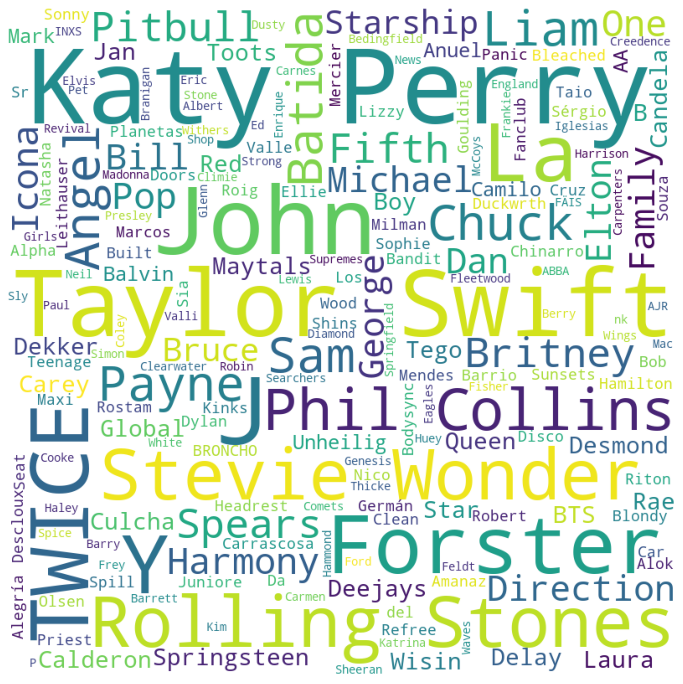

In [62]:
word_cloud = WordCloud(width = 800, height = 800, background_color = "white", stopwords = STOPWORDS).generate(artist_concat34)
plt.figure(figsize = (12, 15))
plt.imshow(word_cloud)
plt.axis("off");
word_cloud.to_file("cluster34.jpg")

In [65]:
cluster34["artist"].value_counts().head(10)

Katy Perry                                          5
Taylor Swift                                        4
Phil Collins                                        3
TWICE                                               3
Stevie Wonder                                       3
The Rolling Stones                                  3
Icona Pop                                           2
Bruce Springsteen                                   2
One Direction                                       2
Unheilig                                            2
Name: artist, dtype: int64

In [66]:
cluster34_top = cluster34[cluster34.artist.str.contains("Katy Perry|Taylor Swift|Phil Collins|TWICE|Stevie Wonder|The Rolling Stones", case = False, regex = True)]
cluster34_top

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,id,html
567,Teenage Dream ...,Katy Perry,0.969013,0.500066,1.326501,0.758951,0.737777,-0.661504,-0.770602,-0.699735,-0.344789,0.534789,0.047079,0.232548,34,5jzKL4BDMClWqRguW5qZvh,https://open.spotify.com/track/5jzKL4BDMClWqRg...
767,I Kissed A Girl ...,Katy Perry,0.877298,0.368730,-0.073361,0.982107,0.737777,-0.217114,-0.809762,-0.699742,-0.358156,0.912681,0.396481,0.232548,34,14iN3o8ptQ8cFVZTEmyQRV,https://open.spotify.com/track/14iN3o8ptQ8cFVZ...
932,(I Can't Get No) Satisfaction - Mono Version ...,The Rolling Stones,1.024042,0.634859,1.046529,0.111024,0.737777,-0.498374,-0.815208,-0.296239,-0.586736,1.402140,0.592685,0.232548,34,5FKkbyGm42hw1y08l2knlO,https://open.spotify.com/track/5FKkbyGm42hw1y0...
1033,Honky Tonk Women - Mono Version ...,The Rolling Stones,0.249050,0.434398,0.486584,0.422713,0.737777,-0.336650,0.201518,-0.621193,-0.799275,1.888001,0.032767,0.232548,34,3RZMzCvYsmJ0u2ioKTOsmJ,https://open.spotify.com/track/3RZMzCvYsmJ0u2i...
1062,"Yester-Me, Yester-You, Yesterday ...",Stevie Wonder,0.441651,-1.024128,0.206611,-0.323884,0.737777,-0.790884,-0.728836,-0.699742,-0.620822,0.703941,-0.627931,0.232548,34,0l9RGwc48deJ6j61KXAAvs,https://open.spotify.com/track/0l9RGwc48deJ6j6...
1161,Sir Duke ...,Stevie Wonder,0.368279,-0.294865,0.206611,-0.062084,0.737777,-0.224146,-0.367514,-0.699742,-0.711051,1.834016,-0.410381,0.232548,34,4pNiE4LCVV74vfIBaUHm1b,https://open.spotify.com/track/4pNiE4LCVV74vfI...
1209,We Can Work It Out ...,Stevie Wonder,0.510438,-0.274128,0.766556,-0.063510,0.737777,-0.707912,-0.590362,-0.699742,-0.606787,1.164609,-0.465950,0.232548,34,6AplSHtiSr0cqimR27ghdV,https://open.spotify.com/track/6AplSHtiSr0cqim...
1241,You Can't Hurry Love - 2016 Remaster ...,Phil Collins,0.515023,0.977025,0.486584,0.757209,0.737777,-0.736038,-0.742852,-0.699742,-0.786576,1.153812,-0.739698,0.232548,34,4YwbSZaYeYja8Umyt222Qf,https://open.spotify.com/track/4YwbSZaYeYja8Um...
1298,Start Me Up - Remastered 2009 ...,The Rolling Stones,0.565467,0.963200,-0.073361,0.828638,0.737777,-0.671348,-0.693797,-0.331209,-0.626838,1.902397,0.131691,0.232548,34,7HKez549fwJQDzx3zLjHKC,https://open.spotify.com/track/7HKez549fwJQDzx...
1362,Sussudio - 2016 Remaster ...,Phil Collins,0.946084,0.973568,-0.073361,0.661865,0.737777,0.024769,-0.667728,-0.448494,-0.896188,1.017051,0.089805,0.232548,34,4qM461TqtpnP4GLRIXwEnW,https://open.spotify.com/track/4qM461TqtpnP4GL...


In [67]:
cluster34_top.to_csv("cluster34_top.csv")

In [68]:
cluster11 = songs_scaled_5000[songs_scaled_5000.cluster == 11]

In [69]:
artist_concat11 = cluster11["artist"].str.cat(sep = " ")

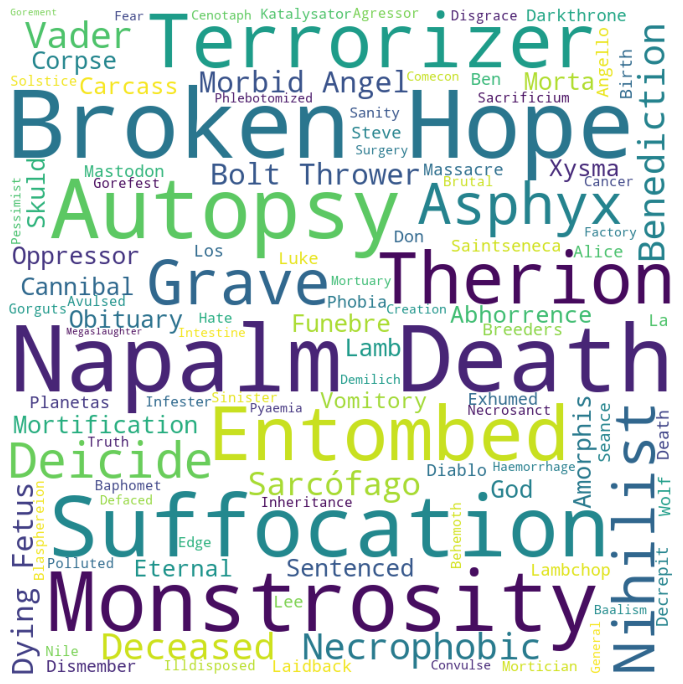

In [70]:
word_cloud = WordCloud(width = 800, height = 800, background_color = "white", stopwords = STOPWORDS).generate(artist_concat11)
plt.figure(figsize = (12, 15))
plt.imshow(word_cloud)
plt.axis("off");
word_cloud.to_file("cluster11.jpg")

In [71]:
cluster11["artist"].value_counts().head(10)

Napalm Death                                        6
Broken Hope                                         6
Monstrosity                                         5
Autopsy                                             5
Suffocation                                         5
Terrorizer                                          4
Therion                                             4
Entombed                                            4
Deicide                                             3
Dying Fetus                                         3
Name: artist, dtype: int64

In [72]:
cluster11_top = cluster11[cluster11.artist.str.contains("Napalm Death|Broken Hope|Monstrosity|Autopsy|Suffocation", case = False, regex = True)]
cluster11_top

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,id,html
3406,Liege of Inveracity ...,Suffocation,-0.892802,0.959744,-1.193250,0.225373,0.737777,0.419938,-0.815770,1.772386,-0.064076,-0.134618,-0.315551,0.232548,11,7qvTHdpc9qu4TMPur5vs9w,https://open.spotify.com/track/7qvTHdpc9qu4TMP...
3460,Disembowel ...,Autopsy,-1.259662,0.752370,-1.193250,0.219672,0.737777,-0.052578,-0.816000,0.290185,0.263422,-0.800427,-0.266806,0.232548,11,2R7KEJHuuXyxN3Jsf77ayC,https://open.spotify.com/track/2R7KEJHuuXyxN3J...
3538,Effigy of the Forgotten ...,Suffocation,-0.819430,0.997762,-0.913278,0.161230,0.737777,0.602757,-0.812677,1.737416,1.032039,0.030934,-0.392885,0.232548,11,0OHTsNrVPPzSEmwqehnJe3,https://open.spotify.com/track/0OHTsNrVPPzSEmw...
3588,Mutilated and Assimilated ...,Broken Hope,-1.369720,1.028868,-0.913278,0.292367,0.737777,1.573102,-0.815859,1.750866,-0.164331,-1.271532,-0.954658,0.232548,11,01omnjyGXUeLD32W7VMxpD,https://open.spotify.com/track/01omnjyGXUeLD32...
3606,Angel of Death ...,Monstrosity,-1.190876,1.125642,-0.913278,-0.026924,0.737777,0.307435,-0.815116,1.358123,0.717908,-0.879604,-0.570158,0.232548,11,7lOGvp9WlpD1K04dM8svcK,https://open.spotify.com/track/7lOGvp9WlpD1K04...
3608,Incinerated ...,Broken Hope,-0.296654,0.558822,-0.633306,-0.675802,0.737777,-0.323993,-0.815807,1.589465,-0.886163,-1.019964,-0.358662,0.232548,11,5oi8PQJFw09xSUcRAY8Oux,https://open.spotify.com/track/5oi8PQJFw09xSUc...
3612,Depths of Depravity ...,Suffocation,-1.030374,0.676333,-1.193250,-0.154419,0.737777,0.265246,-0.816003,1.826186,-0.044025,0.538388,-0.528272,0.232548,11,3MiaEKkBa1QrIH8se9ElJu,https://open.spotify.com/track/3MiaEKkBa1QrIH8...
3685,If The Truth Be Known ...,Napalm Death,-0.865287,0.900988,-1.193250,-0.803614,0.737777,0.687135,-0.815999,1.479174,-0.538614,-0.742844,-0.239897,0.232548,11,6xCNO5uiyv7iWueHj7yoMS,https://open.spotify.com/track/6xCNO5uiyv7iWue...
3692,Breeding the Spawn - Pierced Version ...,Suffocation,-1.007446,0.693614,-1.193250,-0.155845,0.737777,0.673072,-0.816005,1.834256,-0.687659,0.847900,-0.416015,0.232548,11,1WSA3g5lYHiXw7CYCVvyZJ,https://open.spotify.com/track/1WSA3g5lYHiXw7C...
3697,Mass Appeal Madness ...,Napalm Death,-1.085403,0.945919,-1.193250,-0.705419,0.737777,0.230088,-0.815813,1.826186,-0.378207,-1.189115,-0.422419,0.232548,11,0d2yocMUubmC5qL15AZzIF,https://open.spotify.com/track/0d2yocMUubmC5qL...


In [73]:
cluster11_top.to_csv("cluster11_top.csv")

In [76]:
songs_scaled_5000[songs_scaled_5000.cluster == 13]["artist"].value_counts()

Eddie Cochran                                       2
Marvin Gaye                                         2
The Go-Betweens                                     2
Shawn Mendes                                        2
Vàlius                                              2
                                                   ..
Macklemore & Ryan Lewis                             1
Umpah Pah                                           1
Sisa                                                1
Roy of the Ravers                                   1
Shakira                                             1
Name: artist, Length: 112, dtype: int64